# Group By - Pandas

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('weather_data.csv')
df

,day,city,temperature,windspeed,event
0,01-Nov-22,New York,26,2,Rainy
1,02-Nov-22,New York,36,5,Sunny
2,03-Nov-22,New York,37,6,Snow
3,04-Nov-22,New York,32,8,Snow
4,05-Nov-22,Mumbai,29,4,Rainy
5,06-Nov-22,Mumbai,37,2,Rainy
6,07-Nov-22,Mumbai,25,5,Sunny
7,08-Nov-22,Mumbai,28,7,Sunny
8,09-Nov-22,Paris,23,8,Rainy
9,10-Nov-22,Paris,39,5,Rainy


In [11]:
g = df.groupby('city')  # Return a dataFrame group by object; This semilar to SQL groupby; Here G is Group by Object
g

# sql > select * from city_data group by city;

#### G : it is Group by Object

### Group By

- group by object > keys: values, here key = city (New york / Mumbai/ Paris): values is data frame containing new york city
data
- here group by applied based on city
- Here 3 different group having each corresponding data

In [5]:
for city, city_df in g:  # Iteration for each city
    print(city)          # Showing City Name                ; as  Key
    print(city_df)      # Showing City Corresponding data  ; as value (City corresponding values)

Mumbai
         day    city  temperature  windspeed  event
4  05-Nov-22  Mumbai           29          4  Rainy
5  06-Nov-22  Mumbai           37          2  Rainy
6  07-Nov-22  Mumbai           25          5  Sunny
7  08-Nov-22  Mumbai           28          7  Sunny
New York
         day      city  temperature  windspeed  event
0  01-Nov-22  New York           26          2  Rainy
1  02-Nov-22  New York           36          5  Sunny
2  03-Nov-22  New York           37          6   Snow
3  04-Nov-22  New York           32          8   Snow
Paris
          day   city  temperature  windspeed  event
8   09-Nov-22  Paris           23          8  Rainy
9   10-Nov-22  Paris           39          5  Rainy
10  11-Nov-22  Paris           40          9   Snow
11  12-Nov-22  Paris           42         10   Snow
12  13-Nov-22  Paris           31          7   Snow


### Access Specific Dataset

In [10]:
g.get_group('Mumbai')  # Want Mumbai; so this object we get in return in dataFrame

,day,city,temperature,windspeed,event
4,05-Nov-22,Mumbai,29,4,Rainy
5,06-Nov-22,Mumbai,37,2,Rainy
6,07-Nov-22,Mumbai,25,5,Sunny
7,08-Nov-22,Mumbai,28,7,Sunny


In [7]:
g.get_group('New York')

,day,city,temperature,windspeed,event
0,01-Nov-22,New York,26,2,Rainy
1,02-Nov-22,New York,36,5,Sunny
2,03-Nov-22,New York,37,6,Snow
3,04-Nov-22,New York,32,8,Snow


In [9]:
g.get_group('Paris')

,day,city,temperature,windspeed,event
8,09-Nov-22,Paris,23,8,Rainy
9,10-Nov-22,Paris,39,5,Rainy
10,11-Nov-22,Paris,40,9,Snow
11,12-Nov-22,Paris,42,10,Snow
12,13-Nov-22,Paris,31,7,Snow


In [14]:
g.max()  # Max temperature by City- Works as analytics  (Split Apply Combine)

,day,temperature,windspeed,event
city,,,,
Mumbai,08-Nov-22,37,7,Sunny
New York,04-Nov-22,37,8,Sunny
Paris,13-Nov-22,42,10,Snow


#### Assumptions

- Dividing dataset into different group e.g base on City
- Then you are running different analytics on each of this group
- And you are combining diffenent result in sigle dataframe like in     g.max()
- Applying analytics to get aggregated results (Split Apply Combine)


In [16]:
g.mean()   # Average by City

,temperature,windspeed
city,,
Mumbai,29.75,4.50
New York,32.75,5.25
Paris,35.00,7.80


In [18]:
g.min()  # Minimun by City

,day,temperature,windspeed,event
city,,,,
Mumbai,05-Nov-22,25,2,Rainy
New York,01-Nov-22,26,2,Rainy
Paris,09-Nov-22,23,5,Rainy


In [20]:
g.describe() # Description by City

temperature                                                   \
               count   mean       std   min    25%   50%    75%   max   
city                                                                    
Mumbai           4.0  29.75  5.123475  25.0  27.25  28.5  31.00  37.0   
New York         4.0  32.75  4.991660  26.0  30.50  34.0  36.25  37.0   
Paris            5.0  35.00  7.905694  23.0  31.00  39.0  40.00  42.0   

         windspeed                                             
             count  mean       std  min   25%  50%  75%   max  
city                                                           
Mumbai         4.0  4.50  2.081666  2.0  3.50  4.5  5.5   7.0  
New York       4.0  5.25  2.500000  2.0  4.25  5.5  6.5   8.0  
Paris          5.0  7.80  1.923538  5.0  7.00  8.0  9.0  10.0

In [22]:
g.describe().T # Description by City- Transpose

city                  Mumbai  New York      Paris
temperature count   4.000000   4.00000   5.000000
            mean   29.750000  32.75000  35.000000
            std     5.123475   4.99166   7.905694
            min    25.000000  26.00000  23.000000
            25%    27.250000  30.50000  31.000000
            50%    28.500000  34.00000  39.000000
            75%    31.000000  36.25000  40.000000
            max    37.000000  37.00000  42.000000
windspeed   count   4.000000   4.00000   5.000000
            mean    4.500000   5.25000   7.800000
            std     2.081666   2.50000   1.923538
            min     2.000000   2.00000   5.000000
            25%     3.500000   4.25000   7.000000
            50%     4.500000   5.50000   8.000000
            75%     5.500000   6.50000   9.000000
            max     7.000000   8.00000  10.000000

city
Mumbai      AxesSubplot(0.125,0.125;0.775x0.755)
New York    AxesSubplot(0.125,0.125;0.775x0.755)
Paris       AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

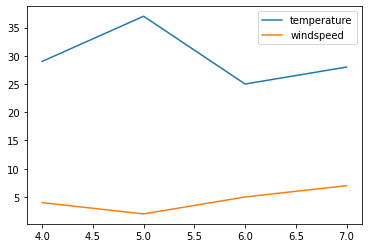

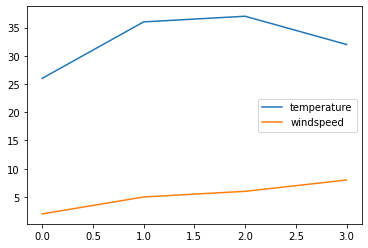

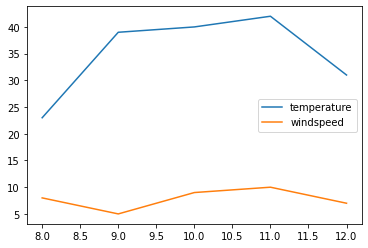

In [30]:
%matplotlib inline    
g.plot()    

- %matplotlib inline: this will allow to show a matplotlib chart in jupyter notebook
- g is group by object; 1st plot = Mumbai; 2nd plot = New York & 3rd plot = Paris